## Introduction: Analysis of the House Sales Market in King County

## Imports

This is an inferential analysis, therefore it will heavily rely on statsmodels for statistical testing, modeling and analysis.

Below is a list of all the necessary imports:

In [783]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
from statsmodels.formula.api import ols
import warnings 


Load data: 

In [784]:
df = pd.read_csv('.\data\kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [785]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## King County Dataset Column Descriptions

* **id:** Unique identifier for a house.
* **date:** Date house was sold.
* **price:** Sale price (prediction target).
* **bedrooms:** Number of bedrooms.
* **bathrooms:**  Number of bathrooms.
* **sqft_living:** Square footage of living space in the home.
* **sqft_lot:** Square footage of the lot.
* **floors:** Number of floors (levels) in house.
* **waterfront:** Whether the house is on a waterfront.
* **view:** Quality of view from house.
* **condition:** How good the overall condition of the house is. Related to maintenance of house
* **grade:** Overall grade of the house. Related to the construction and design of the house.
* **sqft_above:** Square footage of house apart from basement.
* **sqft_basement:** Square footage of the basement.
* **yr_built:** Year when house was built.
* **yr_renovated:** Year when house was renovated.
* **zipcode:** ZIP Code used by the United States Postal Service.
* **lat:** Latitude coordinate.
* **long:** Longitude coordinate.
* **sqft_living15:** The square footage of interior housing living space for the nearest 15 neighbors.
* **sqft_lot15:** The square footage of the land lots of the nearest 15 neighbors.


## EDA and Data Cleaning

Start with EDA to understand the DataFrame, identify inconsistencies and finally run a summary statistics which will determine how to rectify some of the inconsitencies.

In [786]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Rectify data types in the following columns:
* **id:** **integer to object*
* **bathrooms:** **float to integer*
* **floors:** **float to integer*
* **grade:** **object to integer*
* **sqft_basement:** **object to float*
* **yr_built:** **integer to object*
* **yr_renovated:** **float to object*
* **zipcode:** **integer to object*
* **lat:** **integer to object*
* **long:** **integer to object*

start with converting integers to objects ...

proceed to converting floats to the nearest integer ...

In [787]:
floats_to_integers = ['bathrooms', 'floors']
df[floats_to_integers] = df[floats_to_integers].round().astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  int32  
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  int32  
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [788]:
#convert sqft_basement object to float
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors= 'coerce')
df['sqft_basement'].fillna(0.0, inplace= True)


#convert date to object
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  int32         
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  int32         
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [789]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


All the data types are correctly rectified. 

Proceed to eliminating duplicates if there is any ...

In [790]:
df.duplicated().sum()

0

There are no duplicates, so get the df shape summary ...

In [791]:
df.shape

(21597, 21)

* **No. of Rows:** 21597 rows present in the DataFrame.
* **No. of Columns:** 21 columns (variables) present in the DataFrame.

Check for null values in the entire df ...

In [792]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Look at the entries of the objects with null, to decide on the best solution for the NaaNs in these columns ...

In [793]:
waterfront_count = df['waterfront'].value_counts()
waterfront_count

waterfront
NO     19075
YES      146
Name: count, dtype: int64

In [794]:
view_count = df['view'].value_counts()
view_count

view
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: count, dtype: int64

In [795]:
yr_renovated_count = df['yr_renovated'].value_counts()
yr_renovated_count 

yr_renovated
0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: count, Length: 70, dtype: int64

* **waterfront:** Replace NaN with 'UNKNOWN'.
* **view:** Replace NaN with 'UNRATED".
* **yr_renovated:** Replace missing data with the modal value.

In [796]:
df['waterfront'] = df['waterfront'].fillna('UNKNOWN')

df_view_mode = df['view'].mode()[0]
df['view'].fillna(df_view_mode, inplace= True)

yr_renovated_mode = df['yr_renovated'].mode().iloc[0]
df['yr_renovated'].fillna(yr_renovated_mode, inplace= True)

df.isna().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Data Maping 
This is a necessary stage needed to convert categorical data into numeric data.

In [797]:
# Mapping Waterfront, view, condition, grade

# Define a mapping for 'waterfront'
waterfront_mapping = {
    'NO' : 1,
    'UNKNOWN' : 2,
    'YES' : 3
}

# Apply the waterfront_mapping into 'waterfront'
df['waterfront'] = df['waterfront'].map(waterfront_mapping)

# Define a mapping for 'view'
view_mapping = {
    'NONE' : 1,
    'FAIR' : 2,
    'AVERAGE' : 3,
    'GOOD' : 4,
    'EXCELLENT' : 5
}

#Apply view_mapping into 'view'
df['view'] = df['view'].map(view_mapping)

#Define mapping for 'condition'
condition_mapping = {
    'Poor' : 1,
    'Fair' : 2,
    'Average' : 3,
    'Good' : 4,
    'Very Good' : 5
}

#Apply condition_mapping into 'condition'
df['condition'] = df['condition'].map(condition_mapping)

#Define mapping for grade
grade_mapping = {
    '3 Poor' : 1,
    '4 Low' : 2,
    '5 Fair' : 3,
    '6 Low Average' : 4,
    '7 Average' : 5,
    '8 Good' : 6,
    '9 Better' : 7,
    '10 Very Good' : 8,
    '11 Excellent' : 9,
    '12 Luxury' : 10,
    '13 Mansion' : 11
}

#Apply grade_mapping into 'grade'
df['grade'] = df['grade'].map(grade_mapping)



In [798]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  int32         
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  int32         
 8   waterfront     21597 non-null  int64         
 9   view           21597 non-null  int64         
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

In [799]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Cardinality of the object columns

Use cardinality to make an informed data driven approach on the object columns to keep.

In [800]:
cardinality = df.select_dtypes(include= 'object').nunique()
cardinality 

Series([], dtype: float64)

Ids should be unique, however based on the cardinality, there exists duplicate rows with similar ids ...

In [801]:
id_duplicates = df.groupby('id').filter(lambda x: len(x) > 1)
id_duplicates

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,2014-07-25,430000.0,3,2,1580,5000,1,1,1,...,6,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,2014-12-23,700000.0,3,2,1580,5000,1,1,1,...,6,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,2014-06-18,1380000.0,4,3,4290,12103,1,1,4,...,9,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,2014-12-09,1400000.0,4,3,4290,12103,1,1,4,...,9,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,2014-09-05,232000.0,2,1,1240,12092,1,2,1,...,4,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,2015-03-30,502000.0,4,2,2680,5539,2,2,1,...,6,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
20763,6300000226,2014-06-26,240000.0,4,1,1200,2171,2,1,1,...,5,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
20764,6300000226,2015-05-04,380000.0,4,1,1200,2171,2,1,1,...,5,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
21564,7853420110,2014-10-03,594866.0,3,3,2780,6000,2,1,1,...,7,2780,0.0,2013,0.0,98065,47.5184,-121.886,2850,6000


Drop all the id duplicates ...

In [802]:
#Sort the df according to date
df = df.sort_values(by= 'date')

#Drop rows with duplicate ids but keep the last row.
df = df.drop_duplicates(subset='id', keep='last')
df.shape



(21420, 21)

In [803]:
# Extract the year from the date column
df['yr_sold'] = df['date'].dt.year

# Group by the year and count the occurences
yr_sold_count = df.groupby('yr_sold').size()
yr_sold_count

yr_sold
2014    14453
2015     6967
dtype: int64

## Feature Engineering

Create a variable that sums up the total sqft of the house ...

* **Total Square Foot (total_sqft)** = sqft_above + sqft_basement

Drop the sqft_above and the sqft_basement.

In [804]:
#Calculate the total sqft of the house.
df['total_sqft'] = df['sqft_above'] + df['sqft_basement']

#drop the sqft_above and the sqft_basement
df = df.drop(columns=['sqft_above', 'sqft_basement'])


Create a variable that sums up the age of the house

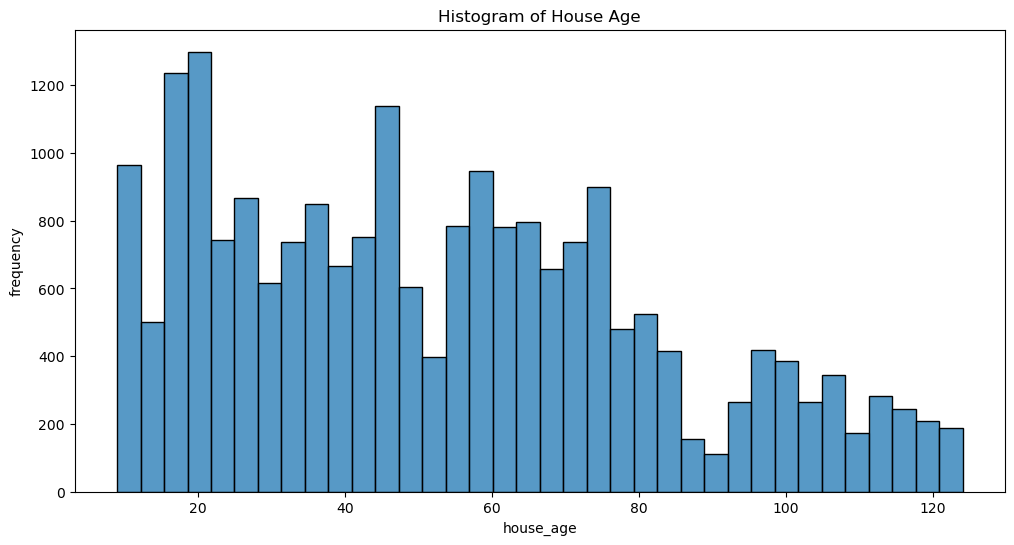

In [805]:
df['house_age'] = 2024 - df['yr_built']

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    
    plt.figure(figsize=(12, 6))
    sns.histplot(df['house_age'])
    plt.title('Histogram of House Age')
    plt.xlabel('house_age')
    plt.ylabel('frequency')

plt.show()

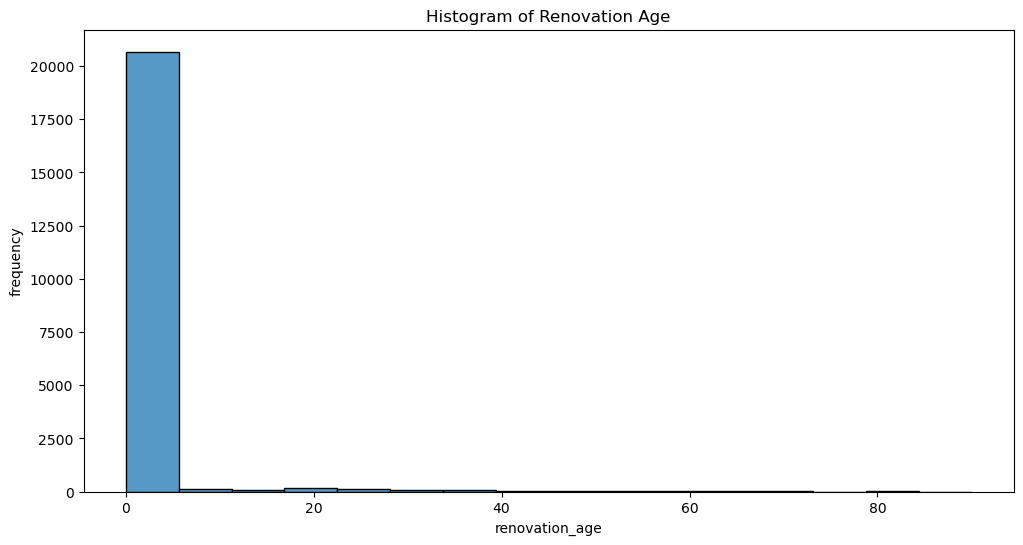

In [806]:
df['renovation_age'] = df.apply(lambda row: 2024 - row['yr_renovated'] if row['yr_renovated'] > 0 else 0, axis=1)
df['renovation_age'] = df['renovation_age'].round().astype(int)

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    
    plt.figure(figsize=(12, 6))
    sns.histplot(df['renovation_age'])
    plt.title('Histogram of Renovation Age')
    plt.xlabel('renovation_age')
    plt.ylabel('frequency')

plt.show()

From the renovation age histogram, both the yr_renovated column and the renovation age column should be dropped.

To eliminate the problem of redundancy in the dataframe, here some other columns that will be dropped:
* date - Not all houses were sold.
* zipcode - Use ID as a unique identifier instead.
* lat - Use ID as a unique identifier.
* long - Use ID as a unique identifier.

In [807]:
df = df.drop(columns= ['date', 'zipcode', 'lat', 'long', 'yr_renovated', 'renovation_age', 'yr_sold'])
df = df.astype({
    'yr_built': object,
    'id' : object
})

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21420 entries, 7316 to 16580
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  object 
 1   price          21420 non-null  float64
 2   bedrooms       21420 non-null  int64  
 3   bathrooms      21420 non-null  int32  
 4   sqft_living    21420 non-null  int64  
 5   sqft_lot       21420 non-null  int64  
 6   floors         21420 non-null  int32  
 7   waterfront     21420 non-null  int64  
 8   view           21420 non-null  int64  
 9   condition      21420 non-null  int64  
 10  grade          21420 non-null  int64  
 11  yr_built       21420 non-null  object 
 12  sqft_living15  21420 non-null  int64  
 13  sqft_lot15     21420 non-null  int64  
 14  total_sqft     21420 non-null  float64
 15  house_age      21420 non-null  int64  
dtypes: float64(2), int32(2), int64(10), object(2)
memory usage: 2.6+ MB


In [808]:
df.shape

(21420, 16)


## Pair plot

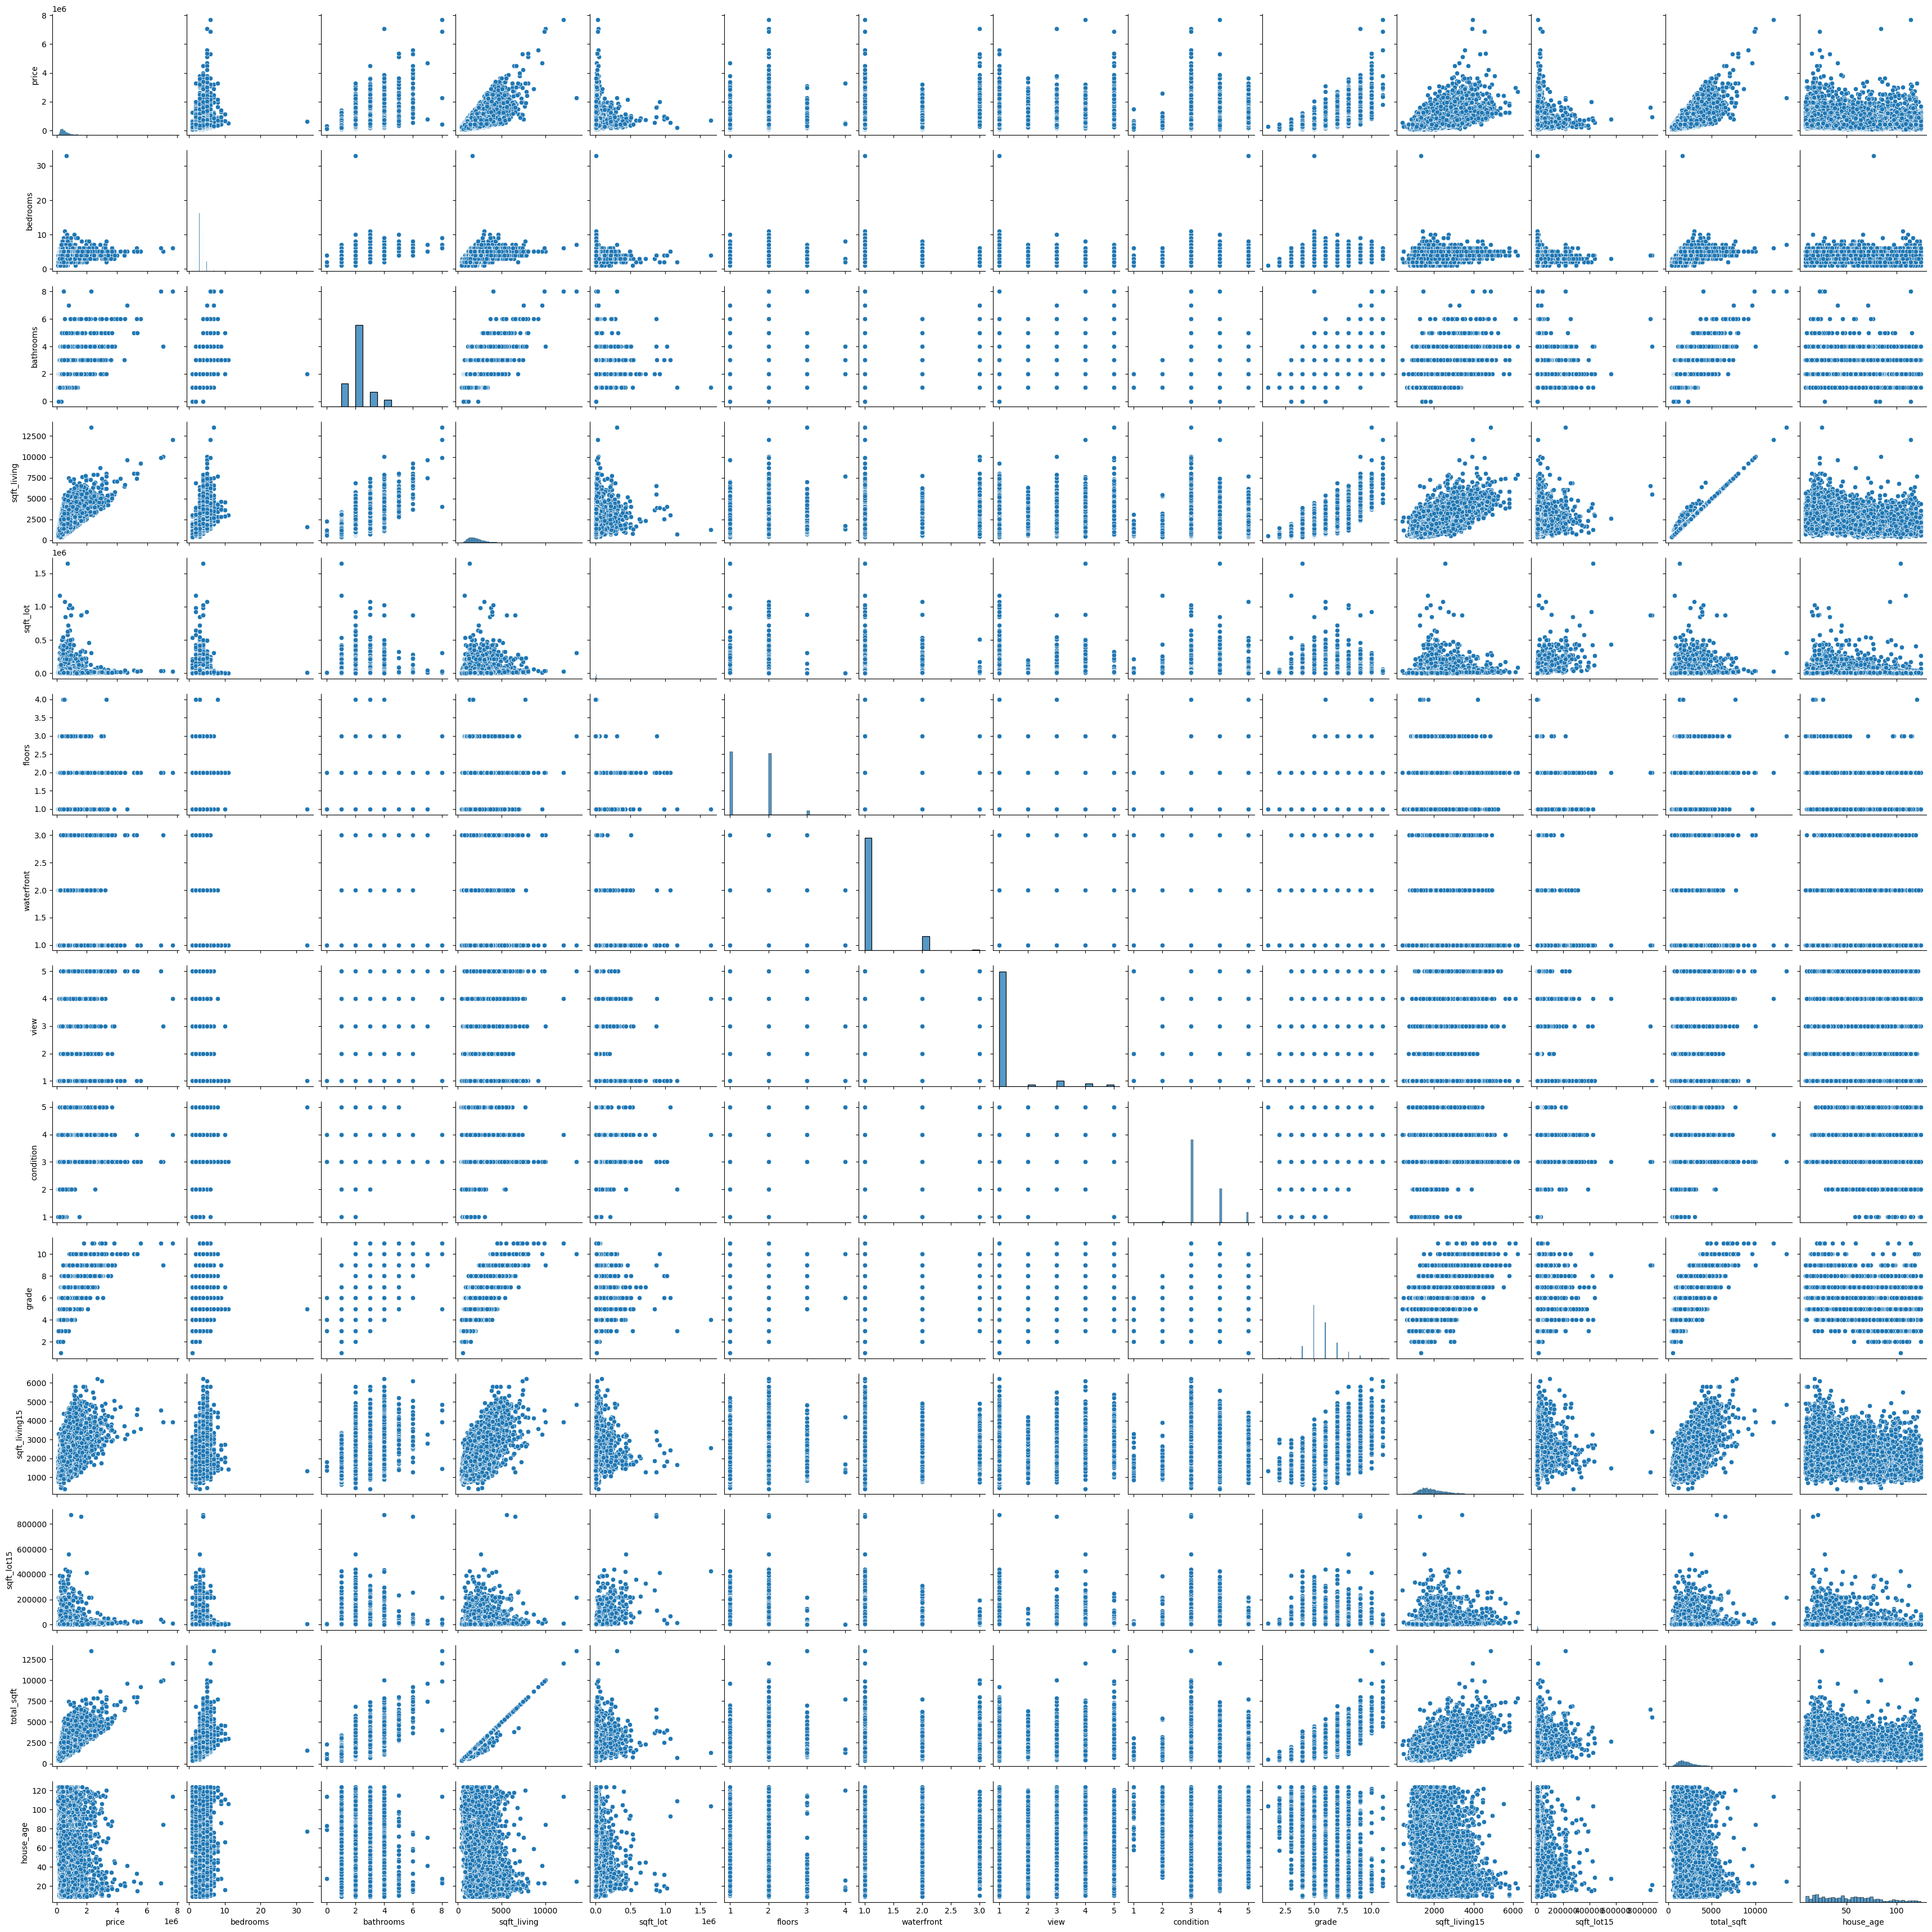

In [809]:
numeric_df = df.select_dtypes(include='number')

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    
    sns.pairplot(numeric_df)


## Correlation Matrix

In [810]:
# numeric_df.corr()

## Feature Selection

In [811]:
# df = df[['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated']]
# df.info()

In [812]:
# numeric_df = df.select_dtypes(include= 'number')

# with warnings.catch_warnings():
#     warnings.simplefilter("ignore", category=FutureWarning)
    
#     sns.pairplot(numeric_df)

## Outliers

* Numeric data

Looking at the above pairplot, most of the numeric data has skewed distribution. Therefore, check for outliers and decide on how to handle them based on the distribution of the data.

In [813]:
# plt.figure(figsize=(16, 10))

# for i, col in enumerate(numeric_df.columns):
#     plt.subplot(2, 3, i + 1)
#     sns.boxplot(x=numeric_df[col])
#     plt.title(f'Boxplot of {col}')
#     plt.xlabel('Values')

# plt.tight_layout()
# plt.show()

In [814]:
# numeric_df.corr()

In [815]:
# with warnings.catch_warnings():
#     warnings.simplefilter("ignore", category=FutureWarning)
    
#     plt.figure(figsize=(16, 10))
    
#     for i, col in enumerate(numeric_df.columns):
#         plt.subplot(2, 3, i + 1)
#         sns.histplot(numeric_df[col], kde=True)
#         plt.title(f'Histogram of {col}')
#         plt.xlabel('Values')
#         plt.ylabel('Frequency')
        
#     plt.tight_layout()
#     plt.show()

In [816]:
# df.info()

## Drop Outliers

In [817]:
# #calculate IQR for selected columns
# Q1 = numeric_df.quantile(0.25)
# Q3 = numeric_df.quantile(0.75)
# IQR = Q3 - Q1

# # Define outlier boundary
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Find outliers
# outliers = ((numeric_df < lower_bound) | (numeric_df > upper_bound)).any(axis=1)


# outlier_indices = numeric_df.index[outliers]

# # Remove all the outliers
# df = df.drop(outlier_indices)

In [818]:
# df.info()

In [819]:
# numeric_df.corr()

The dataframe is clean and consistent.

In [820]:
# df.info()